In [ ]:
!pip install matplotlib
!pip install nltk
!pip install 

# Q2 Letters and Words Analysis 

This section will demonstrate the implementation of our text analysis package. The text chosen to demonstrate the capability of the code is *Pride and Prejudice* by Jane Austen. Before any analysis can be done, we need to do some preprocessing. 

**Preprocessing**

This module takes the full txt file of the novel and reads it in as a string. The code then turns all characters into lower-case, removes punctuation, symbols, and numbers, and stopwords. The stopwords come from the nltk dictionary of common stopwords like "the", "and", "is". The string is then converted to tokens, giving a list of words separated by whitespace. 

The input to this function is the text, and the output is a single long string containing the entire text. The function also prints the number of tokens before/after preprocessing. 

**Text analysis**

The textanalysis.py module is where the analysis comes in. It is capable of listing the most common letters, words, bigrams, and trigrams. The class *TextAnalysis()* is initialized with the full string output given by the preprocessing module. Each function can return both a visualization and a table. These can be changed by setting the parameters *plot* and *table* to False. Both of these parameters are found in every function. 

Before we get started, note that above this cell are install statements for outside modules that are used. If these modules are not installed already, please do so by running the top cell. 

First, load the modules, run preprocessing, and instantiate the analysis class: 


In [19]:
from src.book_analysis.textanalysis import TextAnalysis
from src.book_analysis import textpreprocessing
import matplotlib.pyplot as plt

# The modules depend on stopwords, which are found in the nltk library
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Run text preprocessing on Pride and Prejudice
txt = textpreprocessing.txt_preprocessing(txt_file = 'src/book_analysis/data/PrideAndPrejudice.txt')

# Create an instance of TextAnalysis with the preprocessed text
txt_analysis = TextAnalysis(txt)

### 1. Letter Frequencies

This function shows the frequencies of letters (a-z), plots a bar graph, and returns a table. 

In [ ]:
# Find frequencies of letters a-z
txt_analysis.lettercounter(table = True, plot = True)

### 2. Common Words 

In [ ]:
# Find the 40 most common words and their frequencies
txt_analysis.wordcounter()

### 3. Bigrams and Trigrams

The following functions count and display the most common bigrams and trigrams. The function is called kgramcounter, because it can handle k-grams, or sequences of consecutive words of any length. This parameter is k. Here we use k=2 for bigrams, and k=3 for trigrams. 

In [ ]:
# Find the 20 most common bigrams and their frequencies
txt_analysis.kgramcounter(k = 2)

In [ ]:
# Find the 20 most common trigrams and their frequencies
txt_analysis.kgramcounter(k = 3)

## 4. Operation Complexity

### Text Preprocessing
The time complexity is $O(n)$ because each preprocessing step traverses the entire string containing the book's raw text.

The space complexity is $O(1)$ because the amount of space required for storing additional variables is constant and not proportional to the length of the text input.

### Text Count
The time complexity is $O(nlog_2n)$ because the Counter object's `most_common(n)` method returns a list of the $n$ most common elements and their respective counts, sorted in descending order.

The space complexity is $O(n)$ because there are several additional list variables, such as the lists of bigrams and trigrams, whose lengths are proportional to the number of most common elements $n$ passed into the `most_common(n)` method.

### Letter Distribution

The letter *e* appears most commonly with about 47000 occurrences. After *e*, the letters *n*, *i*, *a*, *t*, *r*, *s*, and *o* occur most commonly with about 20000 to 26000 occurrences each.

### Themes
The book's theme seems to be about the thoughts, emotions, and relationships between people in different families. This is evident from the most commonly occurring words such as the characters' names *elizabeth*, *darcy*, *bennet*, *jane*, and *bingley*, and words such as *could*, *would*, *said*, *miss*, *soon*, *well*, *think*, *lady*, *sister*, *dear*, and *family*.

### Phrase Patterns

The most common two-word phrases are the characters' names such as *mr darcy*, *mrs bennet*, *mr collins*, *lady catherine*, *mr bingley*, *mr bennet*, and *miss bingley*.

The most common three-word phrases include longer character names such as *miss de bourgh*, *catherine de bourgh*, and *sir william lucas*. Some other common three-word phrases are references to a character's dialogue or actions, such as *said mrs bennet*, *said mr bennet*, *said miss bingley*, *mr darcy would*, and *saw mr darcy*. The most common three-word phrase is *copyright george allen*, which occurs twice as much as the next most common three-word phrase. Looking at the book, this phrase actually comes from the line *[_Copyright 1894 by George Allen._]* which is the caption for each illustration in the book, therefore this phrase doesn't have meaning in the context of the story *Pride and Prejudice*.

### Challenge: Sentence structure metrics 

This code relies on a different form of preprocessing, in which the text is split into sentences, rather than words. For some reason, the preprocessing code would not run out of the module, so we have to do it in-line below: 


In [13]:
def sentencesplitter(txt_file='src/book_analysis/data/PrideAndPrejudice.txt'):
    import re
    with open(txt_file, "r", encoding="UTF-8") as file:
        txt = file.read().lower()
    sentences = re.split(r"[.!?]\s+", txt)
    cleaned = []
    for s in sentences:
        s = re.sub(r"[^a-z\s\']", " ", s)
        s = re.sub(r"\s+", " ", s).strip()
        if s:
            cleaned.append(s)
    return cleaned


sentences = sentencesplitter()

In [ ]:
# Measure sentence lengths

lengths = []
for i in sentences: 
    # Split into words
    words = i.split()
    lengths.append(len(words))

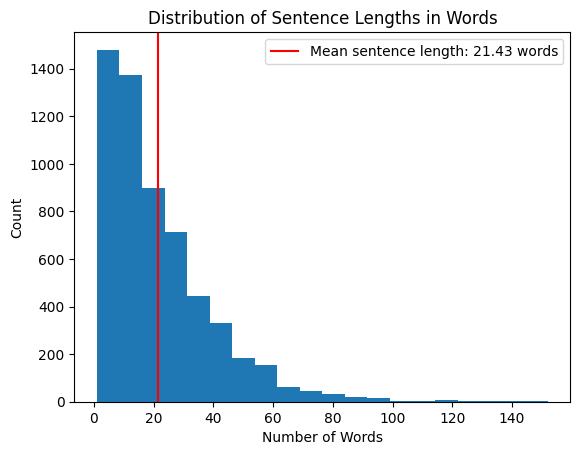

In [34]:
# Plot histogram of sentence lengths
mean = sum(lengths) / len(lengths)

plt.hist(lengths, bins=20)
plt.axvline(mean, c = 'red', label = f'Mean sentence length: {mean:.2f} words')
plt.title('Distribution of Sentence Lengths in Words')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.legend()